# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## PROBLEAM 1:-  Cubic Zirconia

### IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.style
from sklearn import metrics

### IMPORT DATASET

In [2]:
data = pd.read_csv('C:\\Users\\NIIT\\Downloads\\cubic_zirconia.csv')

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
data = data.drop('Unnamed: 0',axis = 1)

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
data.shape

(26967, 10)

In [7]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [9]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [10]:
data.isnull().sum()/data.isnull().sum().sum()*100

carat        0.0
cut          0.0
color        0.0
clarity      0.0
depth      100.0
table        0.0
x            0.0
y            0.0
z            0.0
price        0.0
dtype: float64

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [11]:
for column in data.columns:
    if data[column].dtype != 'object':
        median = data[column].median()
        data[column] = data[column].fillna(median)    
        
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




### 1.3   Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-Square, RMSE.

In [13]:
df = pd.get_dummies(data, columns=['cut','color','clarity'],drop_first=True)

In [14]:
df.head(10)

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1.02,61.5,56.0,6.46,6.49,3.99,9502,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,1.01,63.7,60.0,6.35,6.30,4.03,4836,1,0,0,...,1,0,0,0,1,0,0,0,0,0
7,0.50,61.5,62.0,5.09,5.06,3.12,1415,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,1.21,63.8,64.0,6.72,6.63,4.26,5407,1,0,0,...,1,0,0,0,1,0,0,0,0,0
9,0.35,60.5,57.0,4.52,4.60,2.76,706,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.746564,1.394509,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00
cut_Good,26967.0,0.090518,0.286928,0.0,0.00,0.00,0.00,1.00
cut_Ideal,26967.0,0.401083,0.490127,0.0,0.00,0.00,1.00,1.00
cut_Premium,26967.0,0.255831,0.436335,0.0,0.00,0.00,1.00,1.00


In [16]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### EDA

### Duplicate Treatment

In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [18]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 24)
After (26933, 24)


In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [20]:
df.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price              int64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

### Before outlier treatment

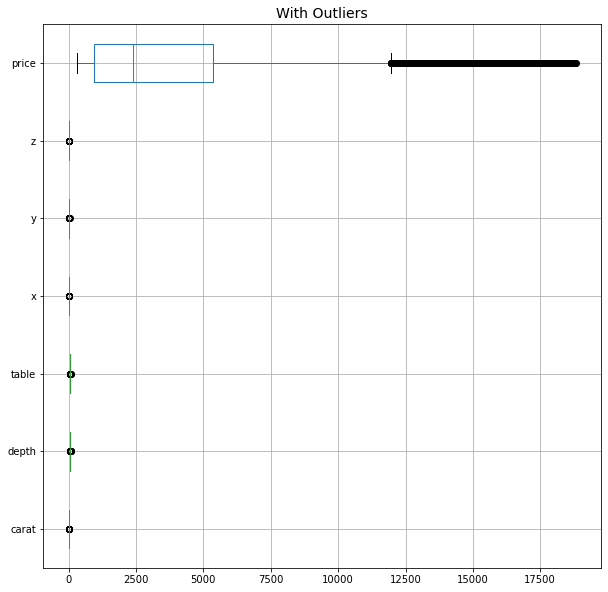

In [21]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=14)
plt.show()

<Figure size 1080x1440 with 0 Axes>

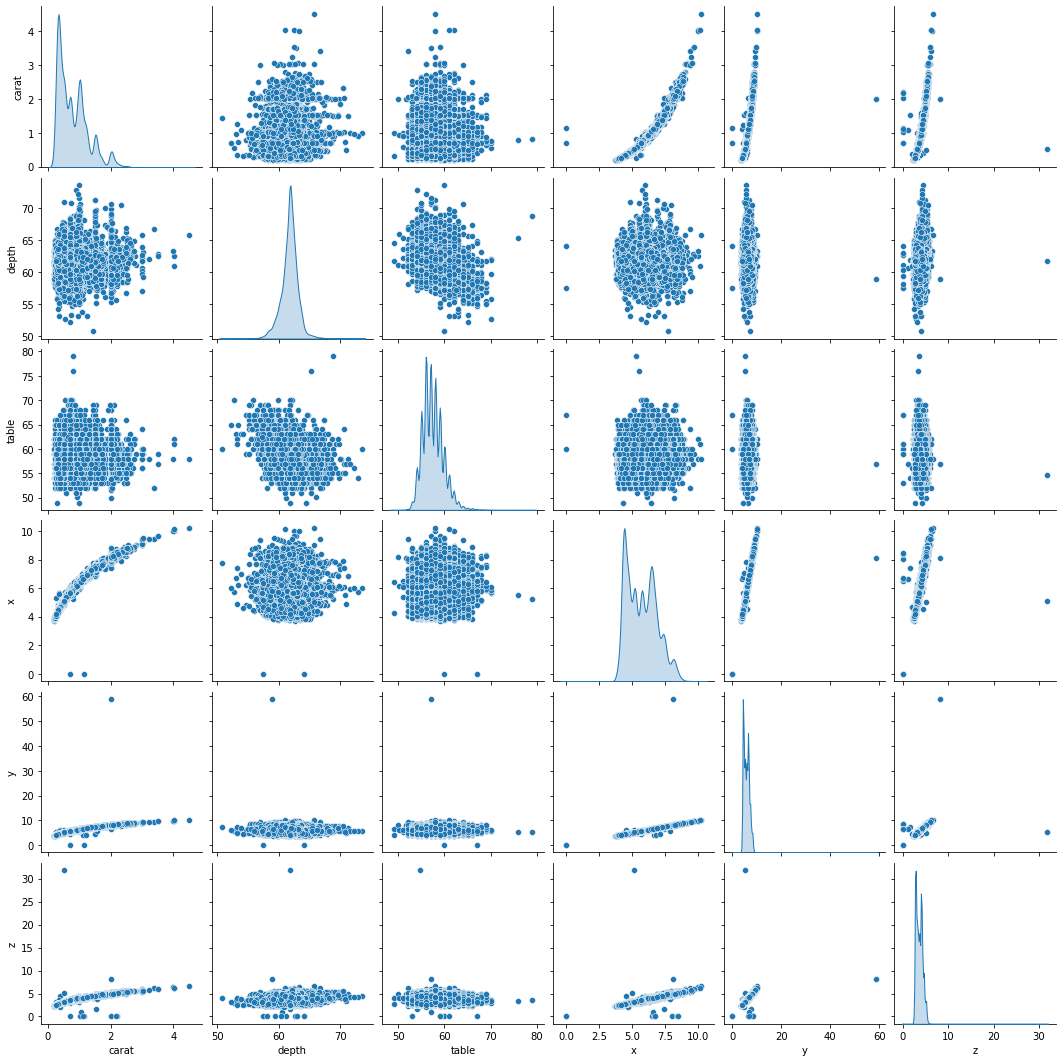

In [22]:
plt.figure(figsize=(15,20))
sns.pairplot(df.iloc[:, 0:6], diag_kind='kde');
plt.show()

### outlier treatment

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

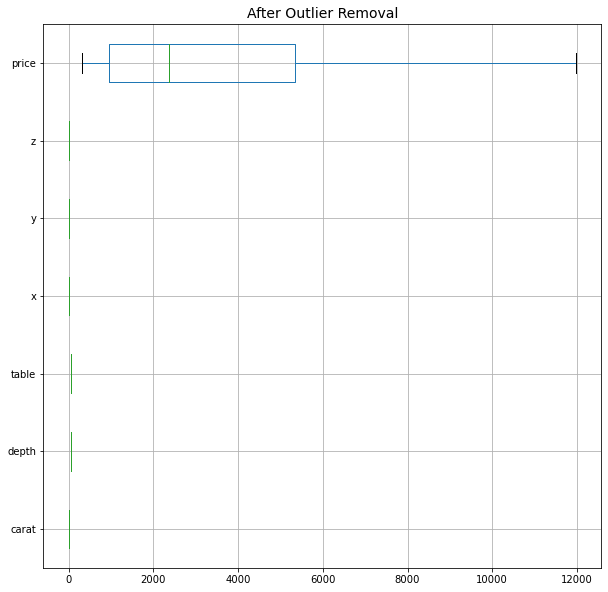

In [25]:
#AFTER TREATMENT
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=14)
plt.show()

<Figure size 1080x1440 with 0 Axes>

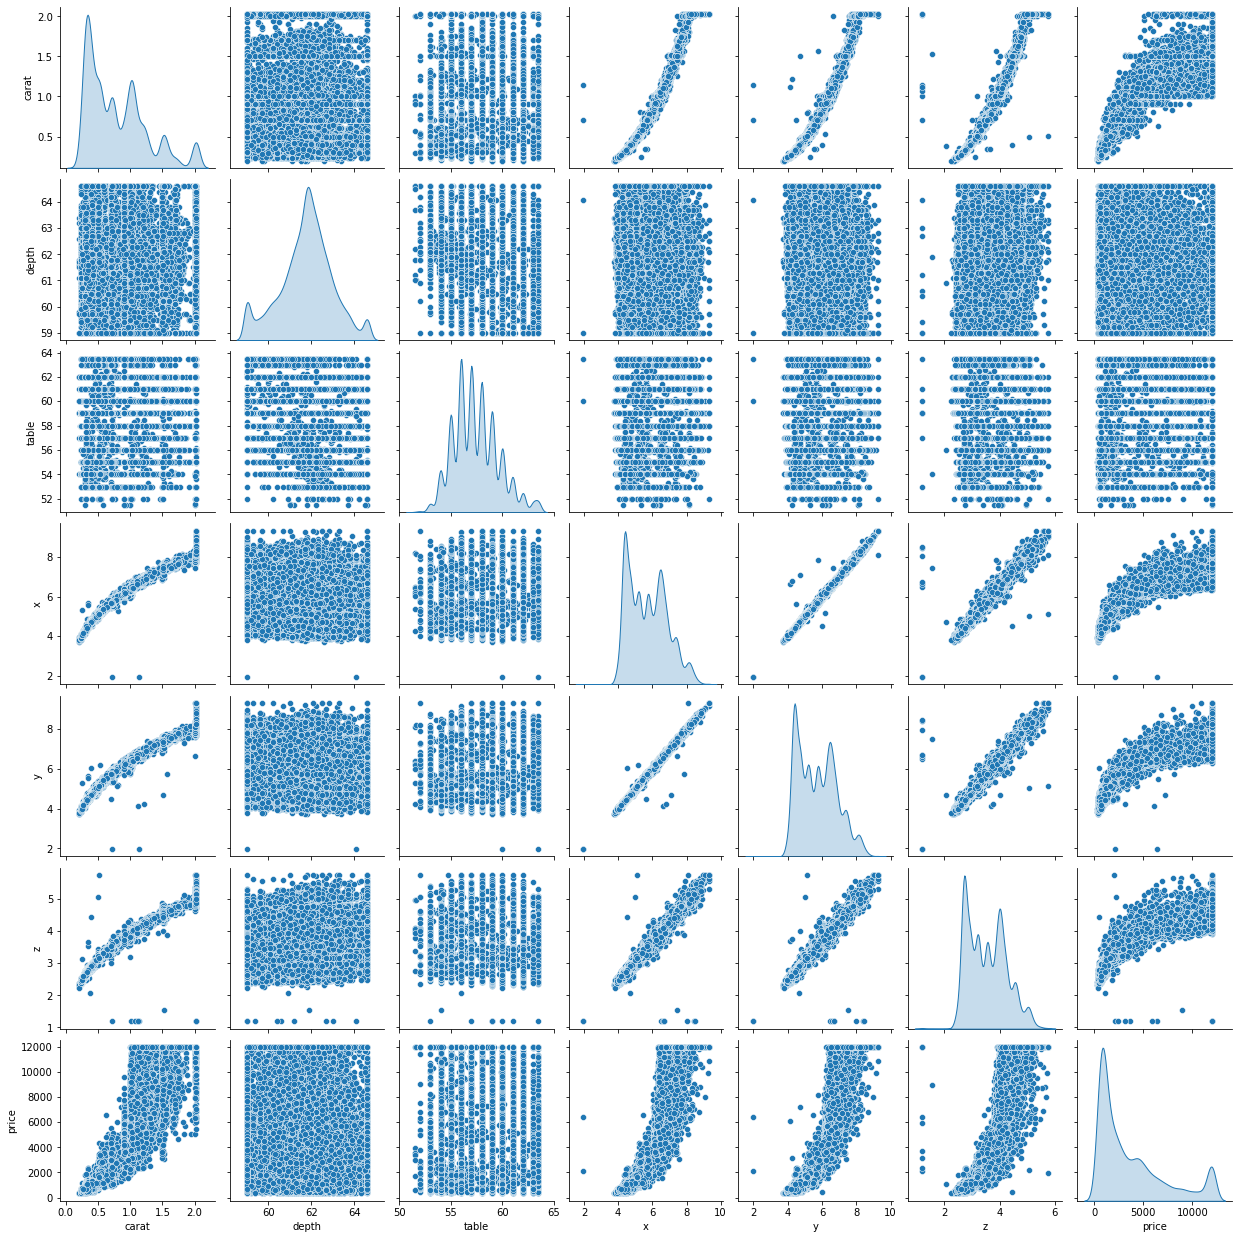

In [26]:
plt.figure(figsize=(15,20));
df_attr = (df[cont]);
sns.pairplot(df_attr, diag_kind='kde');  
plt.show();

In [27]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [28]:
from sklearn import preprocessing

# scale all the columns of the df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [30]:
regression_model = LinearRegression()

In [31]:
regression_model.fit(X_train, y_train) # best fit line / best fit hyper surface

LinearRegression()

In [32]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2161199848933166
The coefficient for depth is -0.00524945788679293
The coefficient for table is -0.011554491519215945
The coefficient for x is -0.38646611278375304
The coefficient for y is 0.2700495128662607
The coefficient for z is -0.03298056416121788
The coefficient for cut_Good is 0.039839061690721045
The coefficient for cut_Ideal is 0.10100540799510391
The coefficient for cut_Premium is 0.08488253609270213
The coefficient for cut_Very Good is 0.0729359991969278
The coefficient for color_E is -0.020260318841904826
The coefficient for color_F is -0.028158796452669756
The coefficient for color_G is -0.05041837437938396
The coefficient for color_H is -0.08862231953540332
The coefficient for color_I is -0.11586427155956072
The coefficient for color_J is -0.1250626084079422
The coefficient for clarity_IF is 0.20648595630414432
The coefficient for clarity_SI1 is 0.31195790843890614
The coefficient for clarity_SI2 is 0.18221135399044158
The coefficient for c

In [33]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0009803459694918194


In [34]:
# R square on training data
regression_model.score(X_train, y_train)

0.9402044588687953

In [35]:
# R square on testing data
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.9419074345242372

In [36]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.24435440092961688

In [37]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2414302482986025

In [38]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.9402044588687953
0.9419074345242372


### UNIVARIET/BIVARIOT

C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


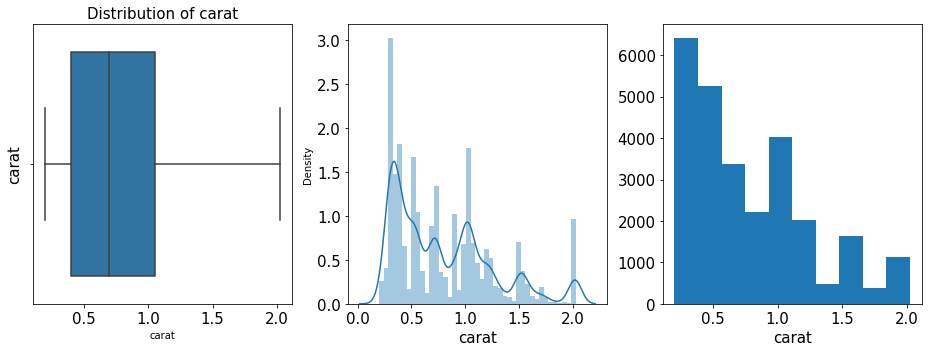

In [39]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='carat',data=df,orient='v',ax=ax1)
ax1.set_ylabel('carat', fontsize=15)
ax1.set_title('Distribution of carat', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['carat'],ax=ax2)
ax2.set_xlabel('carat', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['carat'])
ax3.set_xlabel('carat', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


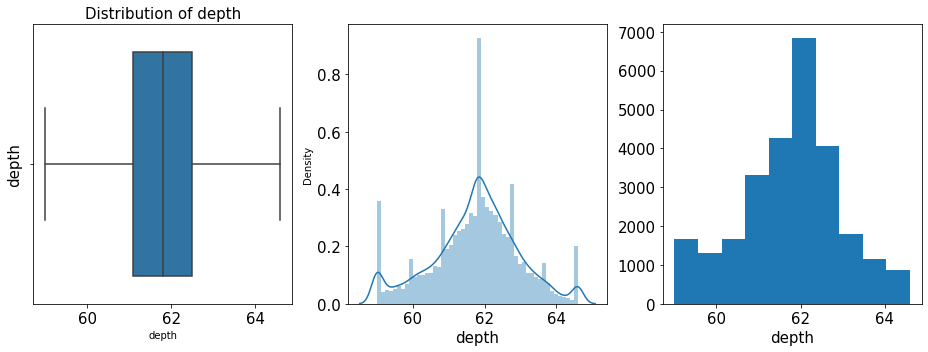

In [40]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='depth',data=df,orient='v',ax=ax1)
ax1.set_ylabel('depth', fontsize=15)
ax1.set_title('Distribution of depth', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['depth'],ax=ax2)
ax2.set_xlabel('depth', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['depth'])
ax3.set_xlabel('depth', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


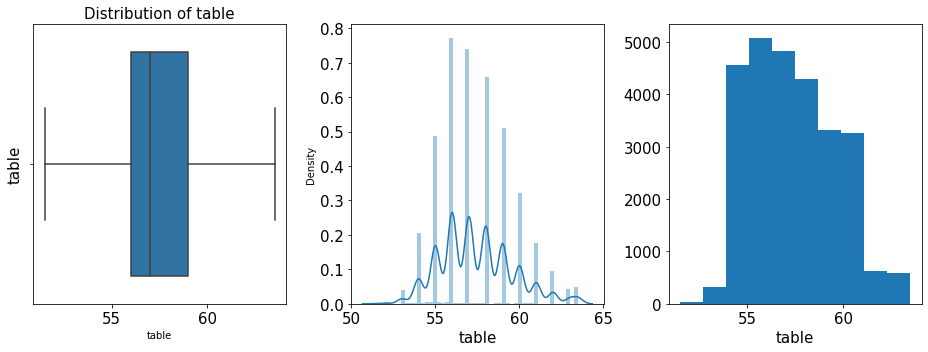

In [41]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='table',data=df,orient='v',ax=ax1)
ax1.set_ylabel('table', fontsize=15)
ax1.set_title('Distribution of table', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['table'],ax=ax2)
ax2.set_xlabel('table', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['table'])
ax3.set_xlabel('table', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


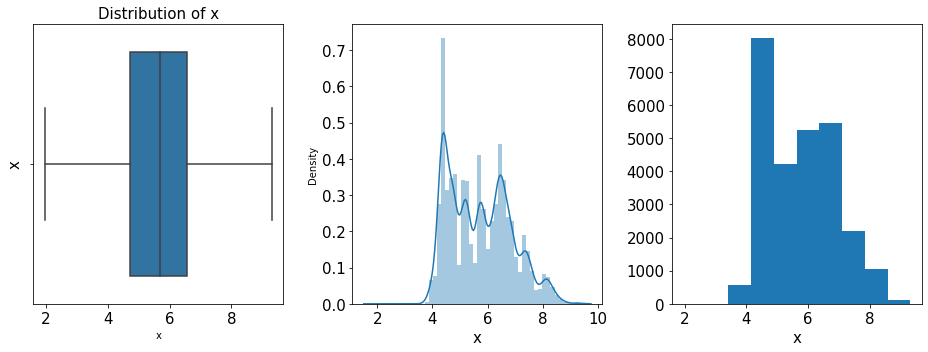

In [42]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='x',data=df,orient='v',ax=ax1)
ax1.set_ylabel('x', fontsize=15)
ax1.set_title('Distribution of x', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['x'],ax=ax2)
ax2.set_xlabel('x', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['x'])
ax3.set_xlabel('x', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


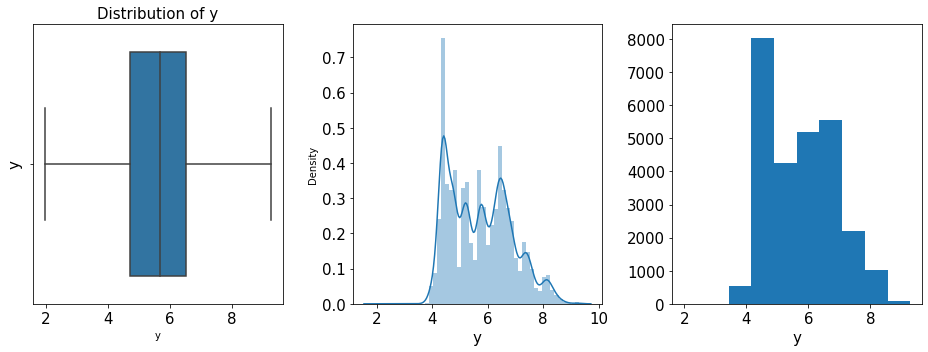

In [43]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='y',data=df,orient='v',ax=ax1)
ax1.set_ylabel('y', fontsize=15)
ax1.set_title('Distribution of y', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['y'],ax=ax2)
ax2.set_xlabel('y', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['y'])
ax3.set_xlabel('y', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


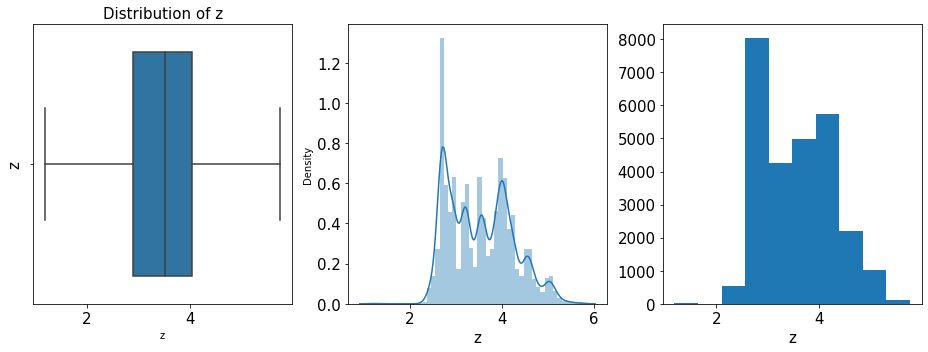

In [44]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='z',data=df,orient='v',ax=ax1)
ax1.set_ylabel('z', fontsize=15)
ax1.set_title('Distribution of z', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['z'],ax=ax2)
ax2.set_xlabel('z', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['z'])
ax3.set_xlabel('z', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\NIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


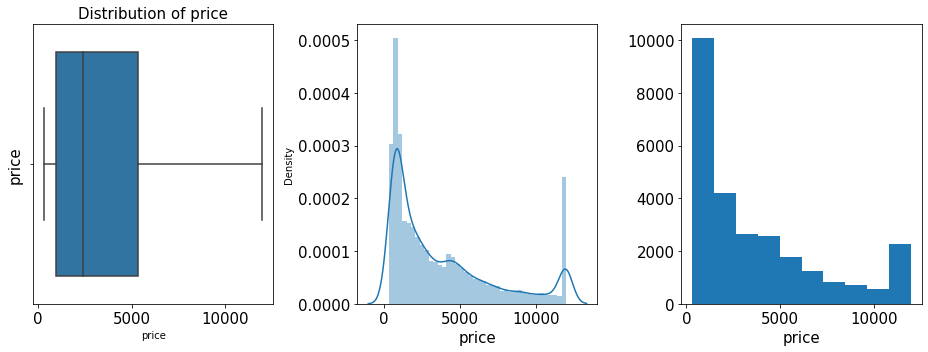

In [45]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='price',data=df,orient='v',ax=ax1)
ax1.set_ylabel('price', fontsize=15)
ax1.set_title('Distribution of price', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['price'],ax=ax2)
ax2.set_xlabel('price', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['price'])
ax3.set_xlabel('price', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### MULTIVARIET

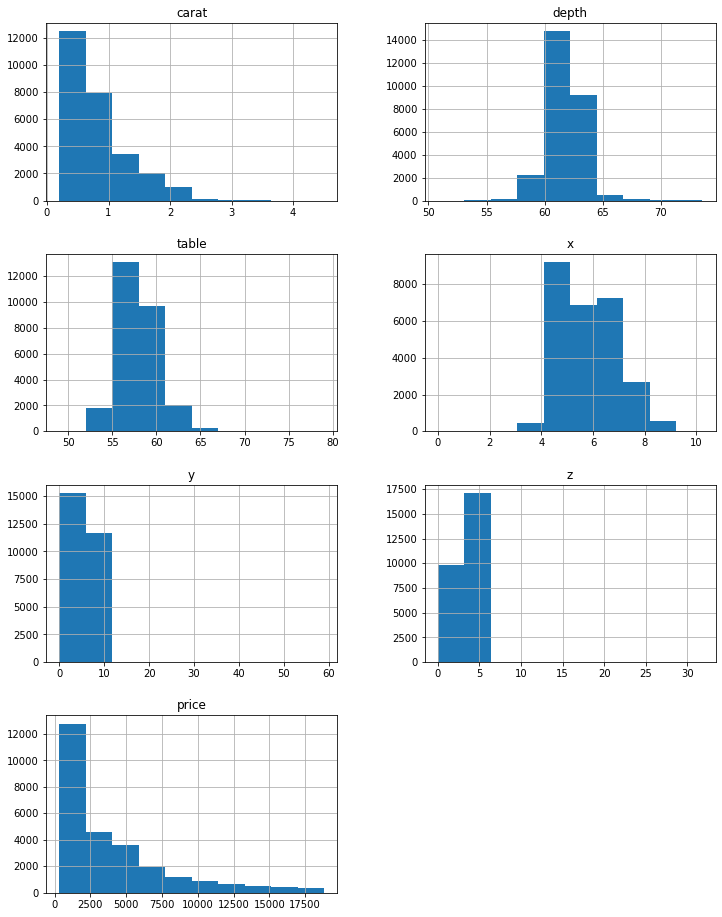

In [46]:
# Let's us only plot the distributions of independent attributes
data.hist(figsize=(12,16),layout=(4,2));

In [47]:
# Let's check the skewness values quantitatively
data.skew().sort_values(ascending =False)

y        3.850189
z        2.568257
price    1.618550
carat    1.116481
table    0.765758
x        0.387986
depth   -0.032042
dtype: float64

### pairplot

<Figure size 1080x1440 with 0 Axes>

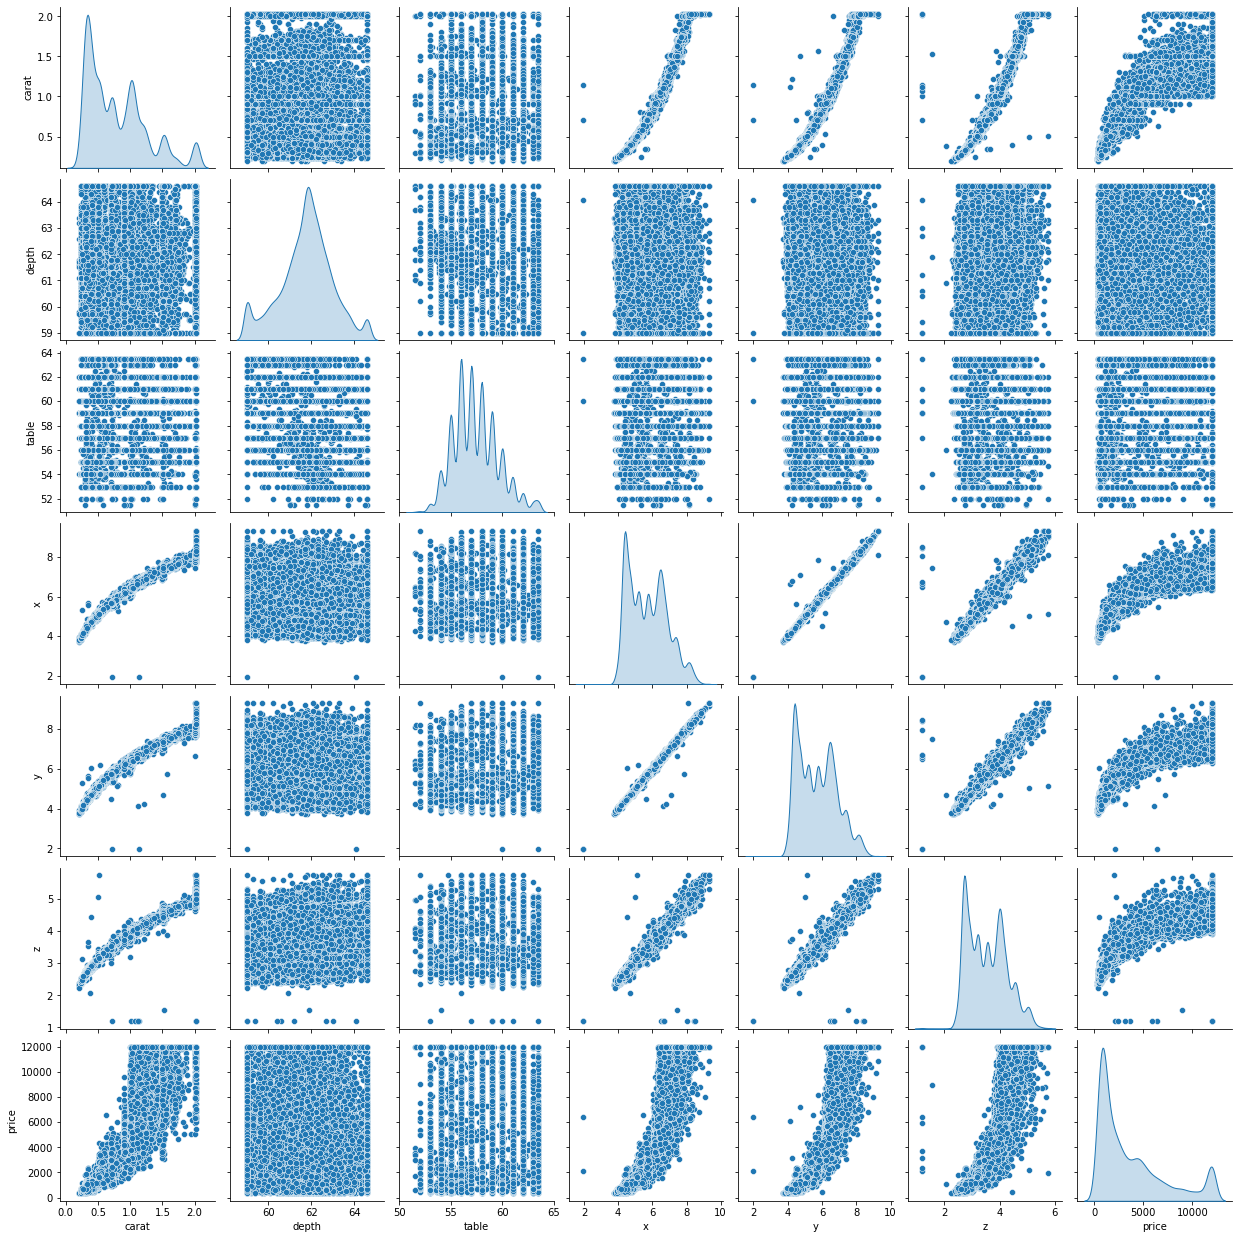

In [48]:
plt.figure(figsize=(15,20))
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

* this plot is more clear and readable then the new data plot

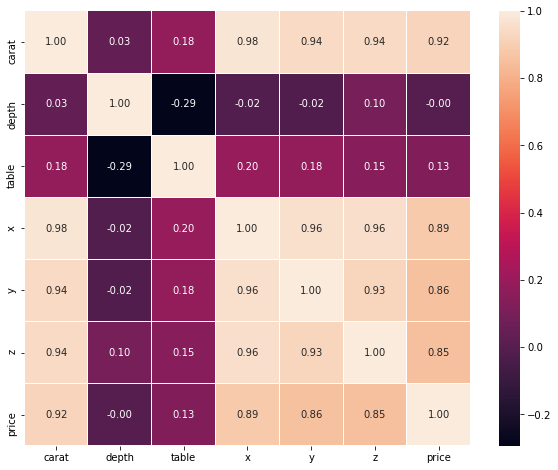

In [49]:
fig,ax = plt.subplots(figsize=(10, 8))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f') 
plt.show()

* Observation
* Strong positive correlation between
  - cart & price, 
  - depth & z cut, 
  - table & y cut
  - x cut & x table
  - z cut & table

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [50]:
for column in data.columns:
    if data[column].dtype != 'object':
        median = data[column].median()
        data[column] = data[column].fillna(median)    
        
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [51]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




1.3   Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-Square, RMSE.

In [52]:
df = pd.get_dummies(data, columns=['cut','color','clarity'],drop_first=True)

In [53]:
df.head(10)

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1.02,61.5,56.0,6.46,6.49,3.99,9502,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,1.01,63.7,60.0,6.35,6.30,4.03,4836,1,0,0,...,1,0,0,0,1,0,0,0,0,0
7,0.50,61.5,62.0,5.09,5.06,3.12,1415,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,1.21,63.8,64.0,6.72,6.63,4.26,5407,1,0,0,...,1,0,0,0,1,0,0,0,0,0
9,0.35,60.5,57.0,4.52,4.60,2.76,706,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.746564,1.394509,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00
cut_Good,26967.0,0.090518,0.286928,0.0,0.00,0.00,0.00,1.00
cut_Ideal,26967.0,0.401083,0.490127,0.0,0.00,0.00,1.00,1.00
cut_Premium,26967.0,0.255831,0.436335,0.0,0.00,0.00,1.00,1.00


In [55]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [168]:
df.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [169]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Salary is 1.2161199848933166
The coefficient for age is -0.00524945788679293
The coefficient for educ is -0.011554491519215945
The coefficient for no_young_children is -0.38646611278375304
The coefficient for no_older_children is 0.2700495128662607
The coefficient for foreign is -0.03298056416121788


### Linear Regression using statsmodels

In [56]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22092,-0.980913,0.533060,1.188856,-1.171530,-1.154830,-1.115091,-0.315271,-0.818506,-0.586083,1.862451,...,-0.338242,-0.237668,-0.18497,-0.567732,-0.451699,-0.422958,1.849410,-0.270711,-0.321987,-0.922347
2275,-1.067471,-0.451751,-1.129093,-1.224808,-1.271095,-1.272969,-0.315271,1.221737,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,-0.451699,-0.422958,1.849410,-0.270711,-0.321987,-0.833827
19165,-0.634681,0.615128,-0.201914,-0.567705,-0.609279,-0.526636,-0.315271,1.221737,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,1.761395,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987,-0.719645
5029,0.663688,1.271669,-0.665503,0.710983,0.759072,0.879916,3.171873,-0.818506,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,2.213862,-0.422958,-0.540713,-0.270711,-0.321987,0.094912
25384,0.490572,-0.533819,2.116035,0.719863,0.678581,0.635922,-0.315271,-0.818506,1.706244,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,2.213862,-0.422958,-0.540713,-0.270711,-0.321987,0.092605


In [57]:
data_train.rename(columns = {"cut_Very Good": "cut_VeryGood"}, inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_VeryGood"}, inplace = True)

In [58]:
expr = 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'

In [59]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       0.000980
carat           1.216120
depth          -0.005249
table          -0.011554
x              -0.386466
y               0.270050
z              -0.032981
cut_Good        0.039839
cut_Ideal       0.101005
cut_Premium     0.084883
cut_VeryGood    0.072936
color_E        -0.020260
color_F        -0.028159
color_G        -0.050418
color_H        -0.088622
color_I        -0.115864
color_J        -0.125063
clarity_IF      0.206486
clarity_SI1     0.311958
clarity_SI2     0.182211
clarity_VS1     0.345786
clarity_VS2     0.366730
clarity_VVS1    0.274347
clarity_VVS2    0.316105
dtype: float64

In [60]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:43:57   Log-Likelihood:                -184.81
No. Observations:               18853   AIC:                             417.6
Df Residuals:                   18829   BIC:                             605.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0010      0.002      0.550   

In [61]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [62]:
np.sqrt(lm1.mse_resid)

0.24451008200785523

In [63]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

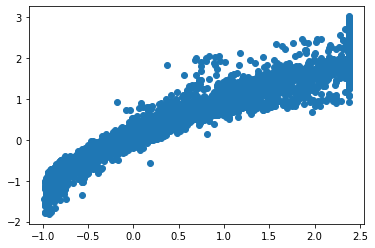

In [64]:
plt.scatter(y_test['price'], y_pred)
plt.show()

*  due to unclear image our next step is impruving image quality

In [65]:
plt.style.use('classic')

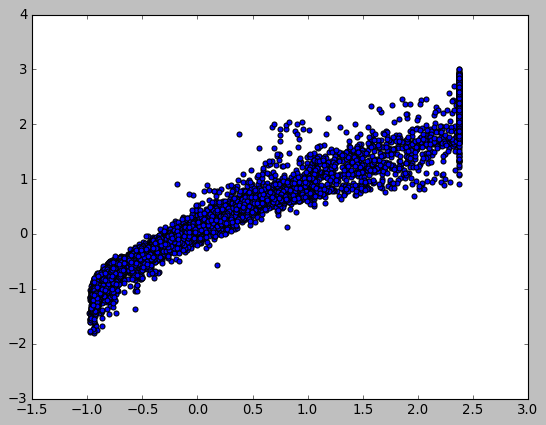

In [66]:
plt.scatter(y_test['price'], y_pred)
plt.show()

### 1.4    Inference: Basis on these predictions, what are the business insights and recommendations.

* Linear regression models are over fit for this dataset. 
* After regularizing using lasso regression technique, we can say that carat, weight, length, width and height of the cubic zirconia are the most important attributes in deciding the good stones that give more profits. 
* Depth attribute is least important and also lowest profitable if decided based on depth.


# Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Problem 2: Logistic Regression and LDA

### Import Library 

In [67]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

### 2.1    Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [68]:
df = pd.read_csv('C:\\Users\\NIIT\\Downloads\\Holiday_Package.csv')
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [69]:
H_data = df.drop('Unnamed: 0', axis = 1)
H_data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [70]:
H_data.shape

(872, 7)

In [71]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [72]:
H_data.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [73]:
H_data.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [74]:
for feature in H_data.columns: 
    if H_data[feature].dtype == 'object': 
        print(feature)
        print(H_data[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [75]:
H_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


### Descriptive Statistics

In [76]:
print('data:',H_data.mean())

data: Salary               47729.172018
age                     39.955275
educ                     9.307339
no_young_children        0.311927
no_older_children        0.982798
dtype: float64


In [77]:
print('data:',H_data.median())

data: Salary               41903.5
age                     39.0
educ                     9.0
no_young_children        0.0
no_older_children        1.0
dtype: float64


In [78]:
print(H_data['Salary'].mode())

0    32197
1    33357
2    35341
3    36976
4    39460
5    40270
6    44280
7    46195
dtype: int64


In [79]:
print(H_data['age'].mode())

0    44
dtype: int64


In [80]:
print(H_data['educ'].mode())

0    8
dtype: int64


In [81]:
print('data_quantile(25%):',H_data.quantile(q=0.25)) #Prints the value below which 25% of the data lies

data_quantile(25%): Salary               35324.0
age                     32.0
educ                     8.0
no_young_children        0.0
no_older_children        0.0
Name: 0.25, dtype: float64


In [82]:
print('data_quantile(50%):',H_data.quantile(q=0.5)) #Prints the value below which 50% of the data lies

data_quantile(50%): Salary               41903.5
age                     39.0
educ                     9.0
no_young_children        0.0
no_older_children        1.0
Name: 0.5, dtype: float64


In [83]:
print('data_quantile(75%):',H_data.quantile(q=0.75)) #Prints the value below which 75% of the data lies

data_quantile(75%): Salary               53469.5
age                     48.0
educ                    12.0
no_young_children        0.0
no_older_children        2.0
Name: 0.75, dtype: float64


### Plotting the summary mean,mode,median using histogram

In [84]:
mean = H_data['Salary'].mean()
median = H_data['Salary'].median()
mode = H_data['Salary'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  47729.172018348625 
Median:  41903.5 
Mode:  32197


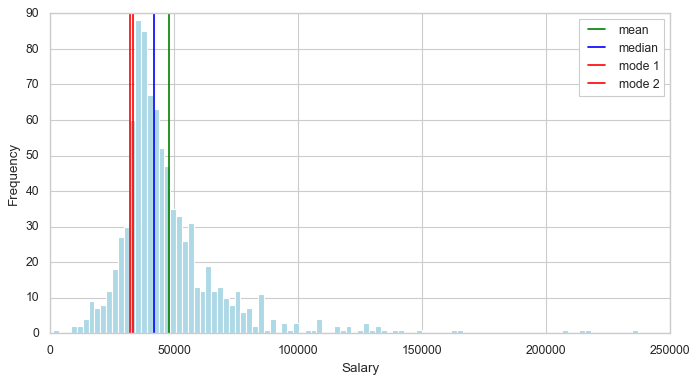

In [85]:
plt.figure(figsize=(10,5))
plt.hist(H_data['Salary'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode 1')
plt.axvline(mode[1],color='red',label='mode 2')

# label x axis

plt.xlabel('Salary')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [86]:
mean = H_data['age'].mean()
median = H_data['age'].median()
mode = H_data['age'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  39.955275229357795 
Median:  39.0 
Mode:  44


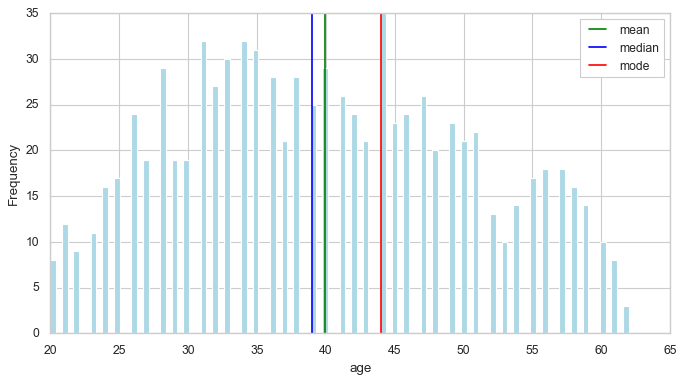

In [87]:
plt.figure(figsize=(10,5))
plt.hist(H_data['age'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('age')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [88]:
mean = H_data['educ'].mean()
median = H_data['educ'].median()
mode = H_data['educ'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  9.307339449541285 
Median:  9.0 
Mode:  8


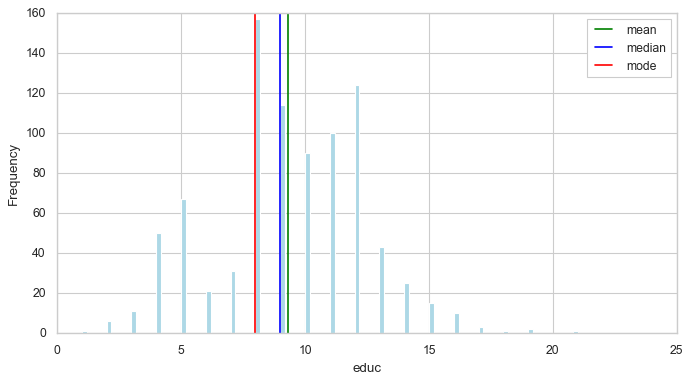

In [89]:
plt.figure(figsize=(10,5))
plt.hist(H_data['educ'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('educ')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [90]:
H_data['Salary'].quantile(0.75)-H_data['Salary'].quantile(0.25)

18145.5

<AxesSubplot:>

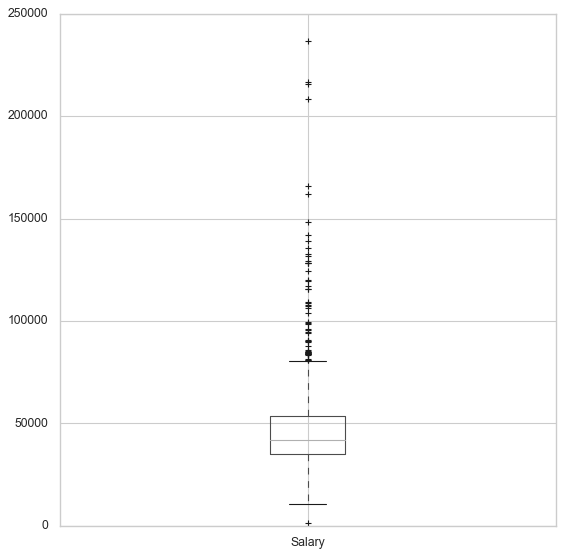

In [91]:
H_data.boxplot(column='Salary',return_type='axes',figsize=(8,8))

In [92]:
H_data['age'].quantile(0.75)-H_data['age'].quantile(0.25)

16.0

<AxesSubplot:>

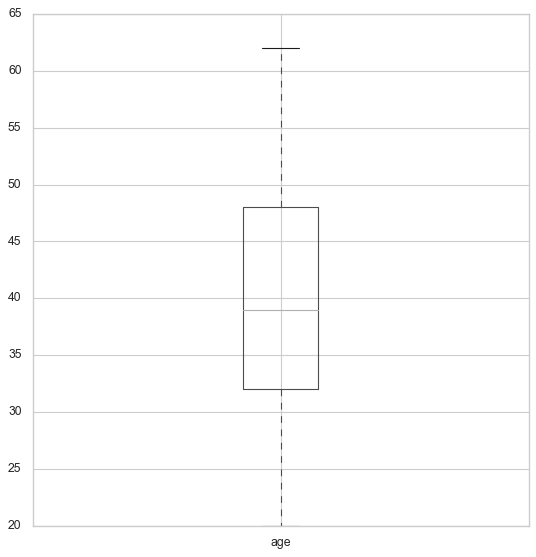

In [93]:
H_data.boxplot(column='age',return_type='axes',figsize=(8,8))

In [94]:
H_data['educ'].quantile(0.75)-H_data['educ'].quantile(0.25)

4.0

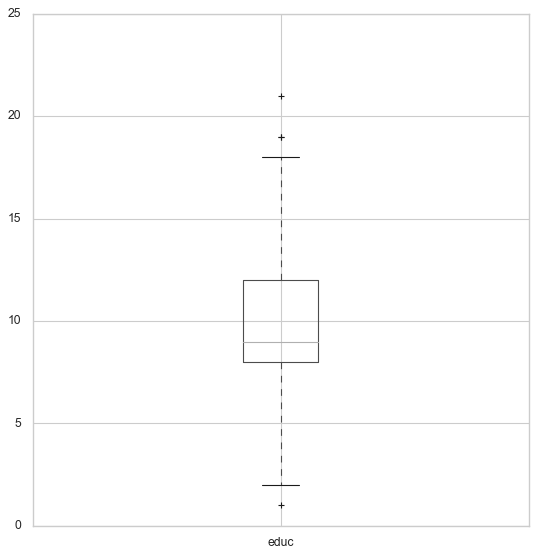

In [95]:
H_data.boxplot(column='educ',return_type='axes',figsize=(8,8));

In [96]:
H_data['no_older_children'].quantile(0.75)-H_data['no_older_children'].quantile(0.25)

2.0

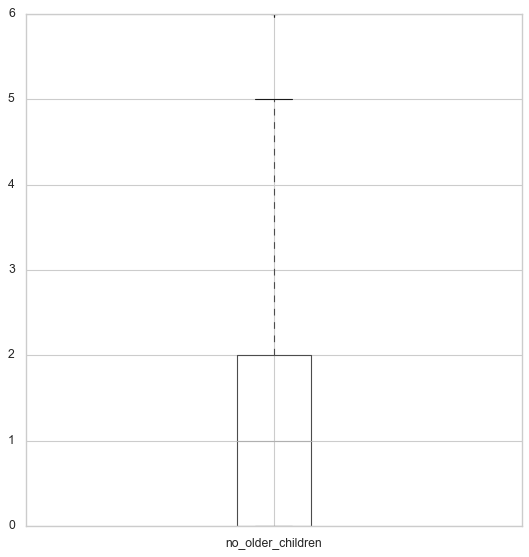

In [97]:
H_data.boxplot(column='no_older_children',return_type='axes',figsize=(8,8));

### Measures of Dispersion

In [98]:
# IQR

H_data['Salary'].quantile(0.75)-H_data['Salary'].quantile(0.25)

18145.5

In [99]:
H_data['age'].quantile(0.75)-H_data['age'].quantile(0.25)

16.0

In [100]:
H_data['educ'].quantile(0.75)-H_data['educ'].quantile(0.25)

4.0

In [101]:
H_data['no_young_children'].quantile(0.75)-H_data['no_young_children'].quantile(0.25)

0.0

In [102]:
H_data['no_older_children'].quantile(0.75)-H_data['no_older_children'].quantile(0.25)

2.0

In [103]:
#  Range

H_data['Salary'].max()-H_data['Salary'].min()

235639

In [104]:
H_data['age'].max()-H_data['age'].min()

42

In [105]:
H_data['no_young_children'].max()-H_data['no_young_children'].min()

3

In [106]:
H_data['no_older_children'].max()-H_data['no_older_children'].min()

6

In [107]:
#  Variance
H_data.var()

Salary               5.484340e+08
age                  1.113378e+02
educ                 9.218867e+00
no_young_children    3.756096e-01
no_older_children    1.181104e+00
dtype: float64

In [108]:
# standard deviation
H_data.std()

Salary               23418.668531
age                     10.551675
educ                     3.036259
no_young_children        0.612870
no_older_children        1.086786
dtype: float64

In [109]:
H_data.cov() #Prints the covariance of each attribute against every other attribute

,Salary,age,educ,no_young_children,no_older_children
Salary,5.484340e+08,17719.779229,23218.662341,-425.752915,2895.613755
age,1.771978e+04,111.337837,-4.783024,-3.356871,-1.332573
educ,2.321866e+04,-4.783024,9.218867,0.183012,-0.119851
no_young_children,-4.257529e+02,-3.356871,0.183012,0.375610,-0.158807
no_older_children,2.895614e+03,-1.332573,-0.119851,-0.158807,1.181104


In [110]:
H_data.corr() # prints the correlation coefficient between every pair of attributes

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


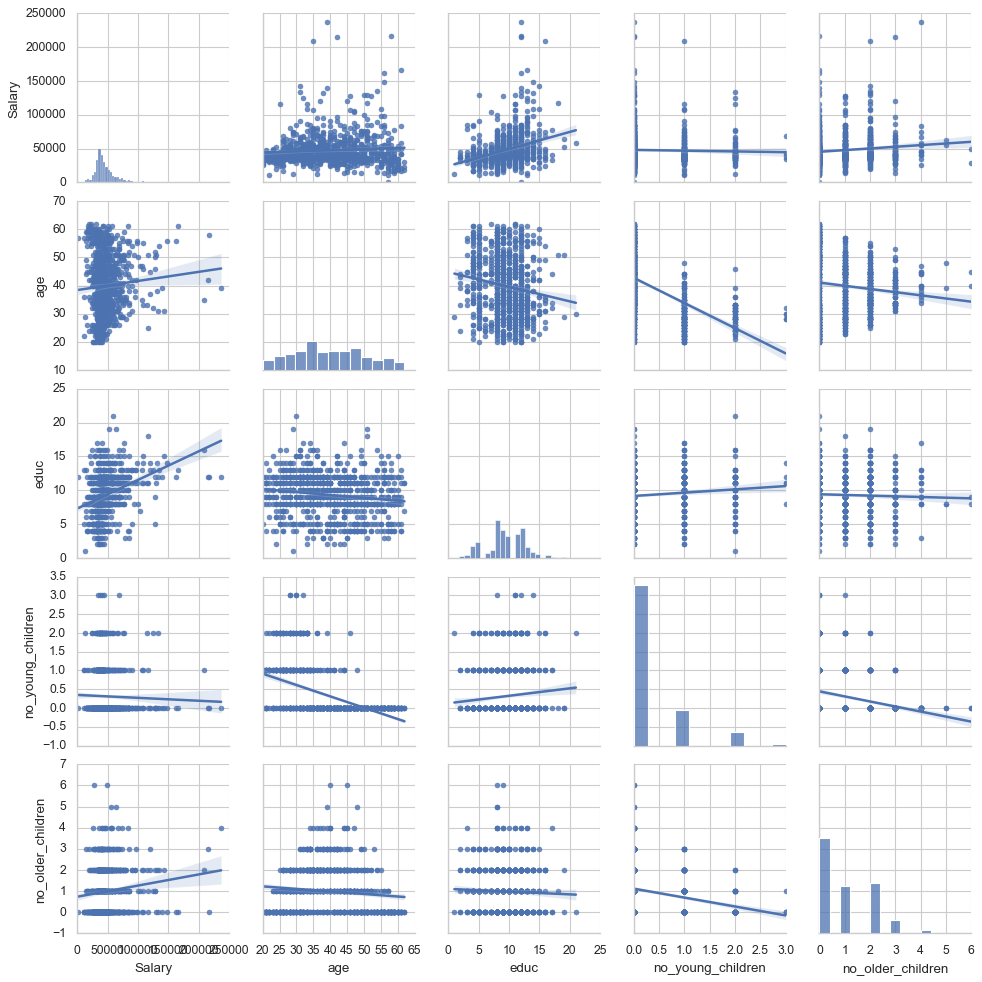

In [111]:
import seaborn as sns
sns.pairplot(H_data,kind='reg'); #plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

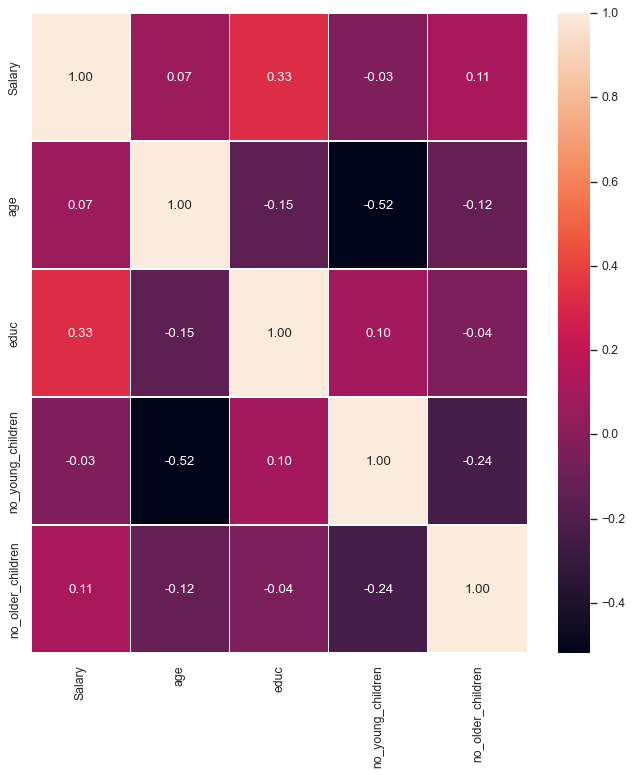

In [112]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(H_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f') 
plt.show()

In [113]:
H_data.skew() #to measure the skeweness of every attribute

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [114]:
import scipy.stats as stats

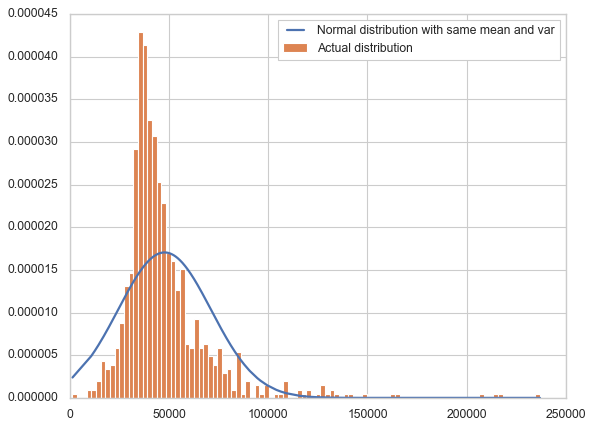

In [115]:
#convert pandas DataFrame object to numpy array and sort

h = np.asarray(H_data['Salary'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram

plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2 
plt.legend()
plt.show()

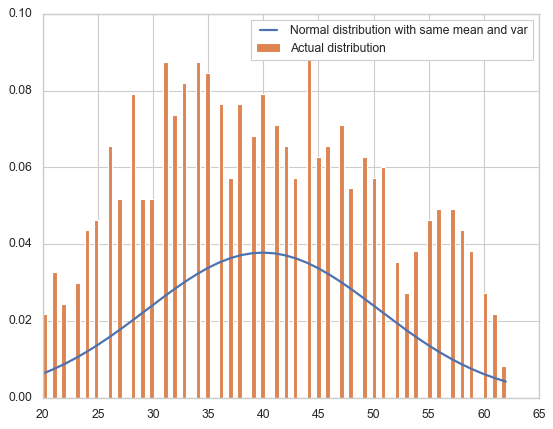

In [116]:
h1 = np.asarray(H_data['age'])
h1 = sorted(h1)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h1, np.mean(h1), np.std(h1)) 
 
#plot both series on the histogram

plt.plot(h1,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h1,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2 
plt.legend()
plt.show()

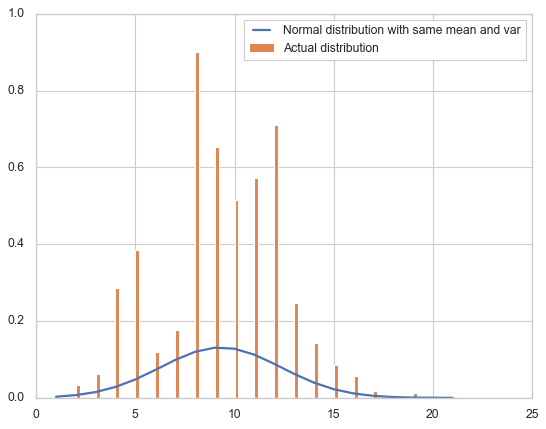

In [117]:
h2 = np.asarray(H_data['educ'])
h2 = sorted(h2)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h2, np.mean(h2), np.std(h2)) 
 
#plot both series on the histogram

plt.plot(h2,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h2,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2 
plt.legend()
plt.show()

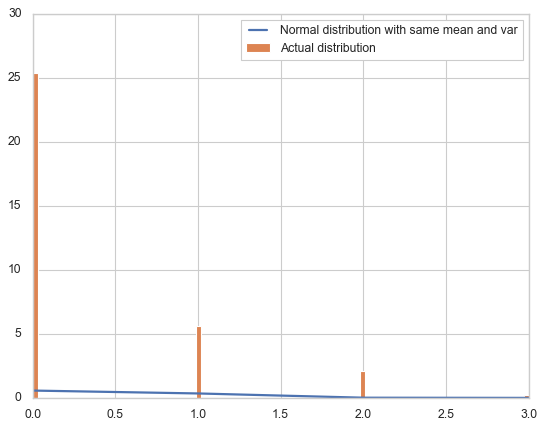

In [118]:
h3 = np.asarray(H_data['no_young_children'])
h3 = sorted(h3)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h3, np.mean(h3), np.std(h3)) 
 
#plot both series on the histogram

plt.plot(h3,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h3,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2 
plt.legend()
plt.show()

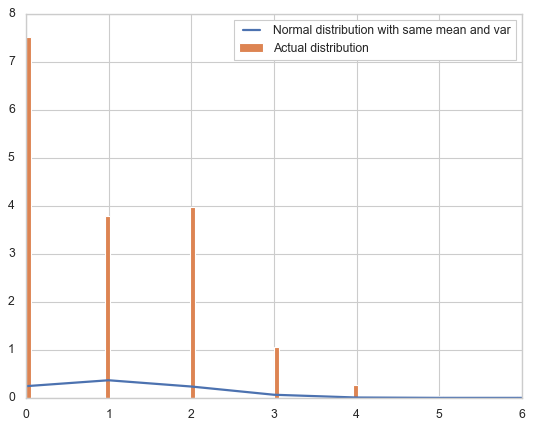

In [119]:
h4 = np.asarray(H_data['no_older_children'])
h4 = sorted(h4)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h4, np.mean(h4), np.std(h4)) 
 
#plot both series on the histogram

plt.plot(h4,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h4,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2 
plt.legend()
plt.show()

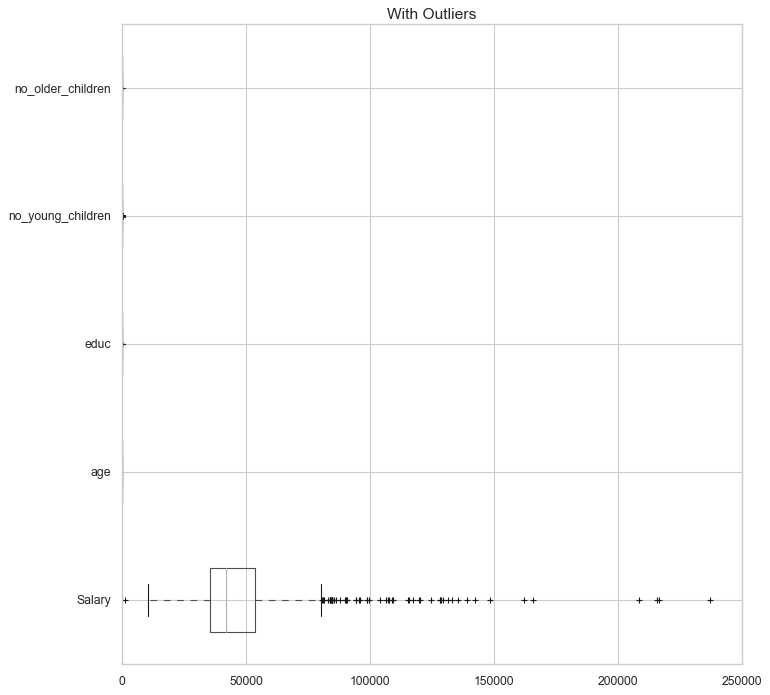

In [120]:
cont=H_data.dtypes[(H_data.dtypes!='uint8') & (H_data.dtypes!='bool')].index
plt.figure(figsize=(10,10))
H_data[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=14)
plt.show()

In [121]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [122]:
for column in H_data.columns:
     if H_data[column].dtype != 'object': 
         lr,ur=remove_outlier(H_data[column])
         H_data[column]=np.where(H_data[column]>ur,ur,H_data[column])
         H_data[column]=np.where(H_data[column]<lr,lr,H_data[column])

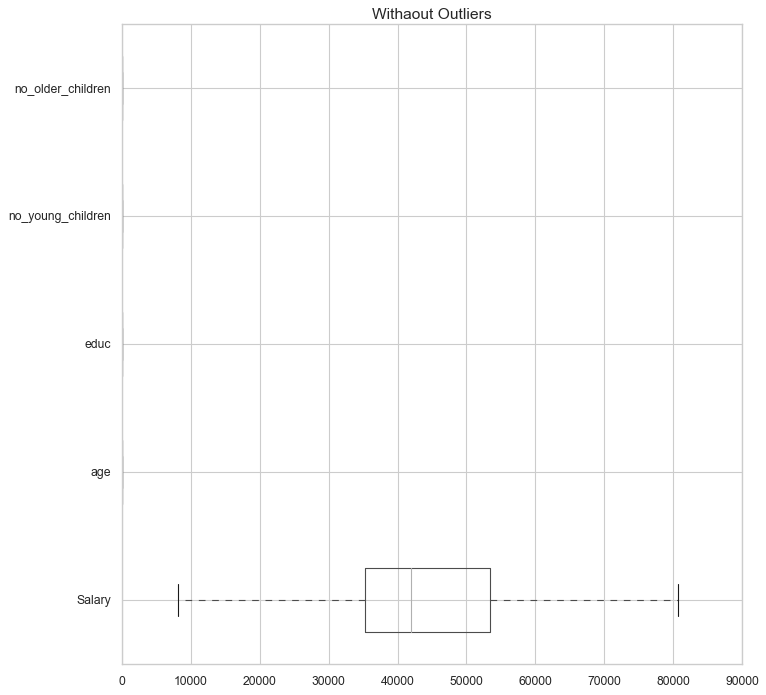

In [123]:
cont=H_data.dtypes[(H_data.dtypes!='uint8') & (H_data.dtypes!='bool')].index
plt.figure(figsize=(10,10))
H_data[cont].boxplot(vert=0)
plt.title('Withaout Outliers',fontsize=14)
plt.show()

In [124]:
H_data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [125]:
##Identify duplicates records in the data
dupes = H_data.duplicated()
print("Number of duplicate records =", sum(dupes))

Number of duplicate records = 1


In [126]:
H_data.drop_duplicates(inplace=True) 
dups = H_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(H_data.shape)

Number of duplicate rows = 0
(871, 7)


### 2.2    Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [127]:
for column in H_data.columns:
    if H_data[column].dtype == 'object':
        print(column.upper(),': ',H_data[column].nunique())
        print(H_data[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     470
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     655
Name: foreign, dtype: int64




In [128]:
# converting object to categorical codes

for feature in H_data.columns: 
    if H_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(H_data[feature].unique()))
        print(pd.Categorical(H_data[feature].unique()).codes)
        H_data[feature] = pd.Categorical(H_data[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [129]:
H_data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


In [130]:
# Copy all the predictor variables into X dataframe
x = H_data.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = H_data['Holliday_Package']

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1,stratify=y)

In [133]:
y_train.value_counts(1)

0    0.54023
1    0.45977
Name: Holliday_Package, dtype: float64

In [134]:
y_test.value_counts(1)

0    0.538168
1    0.461832
Name: Holliday_Package, dtype: float64

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2);
model.fit(x_train, y_train);

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.4s finished


In [137]:
# Predicting on Training and Test dataset

ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [138]:
# Getting the Predicted Classes and Probs

ytest_predict_prob=model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.640768,0.359232
1,0.431918,0.568082
2,0.675941,0.324059
3,0.286312,0.713688
4,0.433515,0.566485


In [139]:
# Model Evaluation

# Accuracy - Training Data
model.score(x_train, y_train)

0.6272577996715928

In [140]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

### 2.3    Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare both the models and write inference which model is best/optimized.

AUC: 0.663


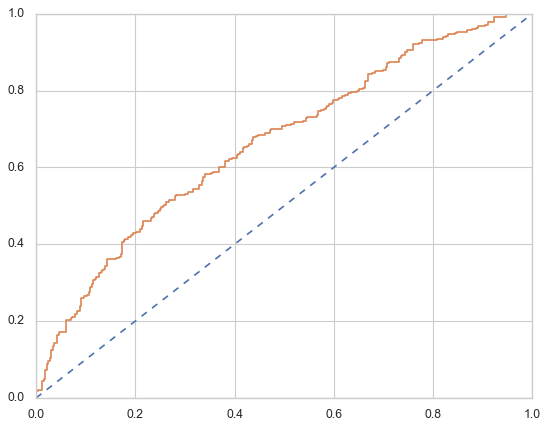

In [141]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [142]:
# Accuracy - Test Data
model.score(x_test, y_test)

0.6564885496183206

AUC: 0.663


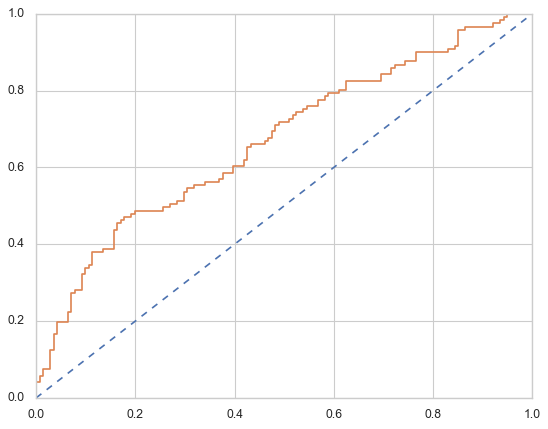

In [143]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [144]:
# Confusion Matrix for the training data

confusion_matrix(y_train, ytrain_predict)

array([[259,  70],
       [157, 123]], dtype=int64)

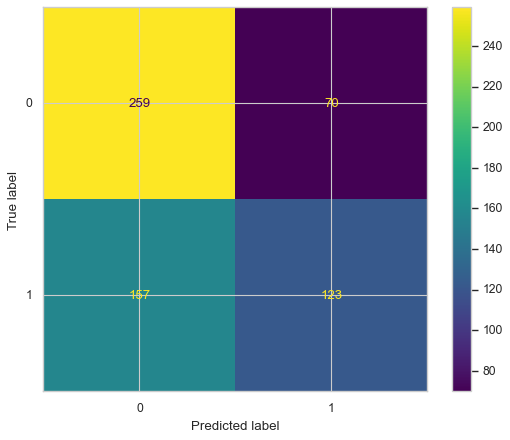

In [145]:
plot_confusion_matrix(model,x_train,y_train);

In [146]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70       329
           1       0.64      0.44      0.52       280

    accuracy                           0.63       609
   macro avg       0.63      0.61      0.61       609
weighted avg       0.63      0.63      0.61       609



In [147]:
# Confusion Matrix for test data
confusion_matrix(y_test, ytest_predict)

array([[117,  24],
       [ 66,  55]], dtype=int64)

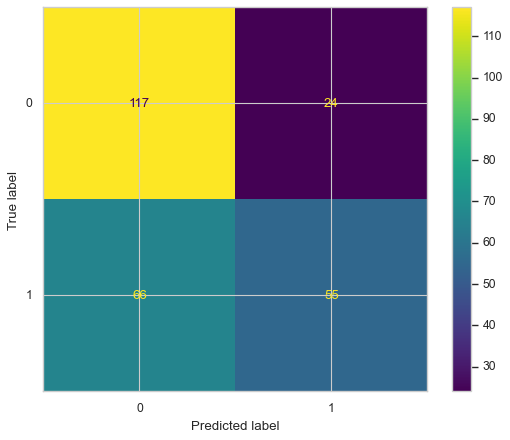

In [148]:
plot_confusion_matrix(model,x_test,y_test);

In [149]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       141
           1       0.70      0.45      0.55       121

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.64       262



## LDA

In [150]:
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

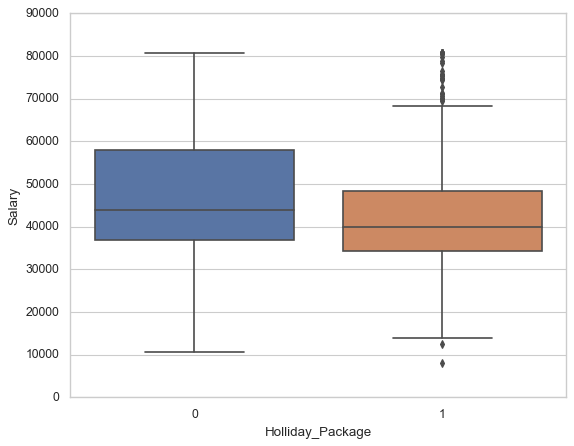

In [151]:
# Bi-Variate Analysis with Target variable

sns.boxplot(H_data['Holliday_Package'],H_data['Salary']);

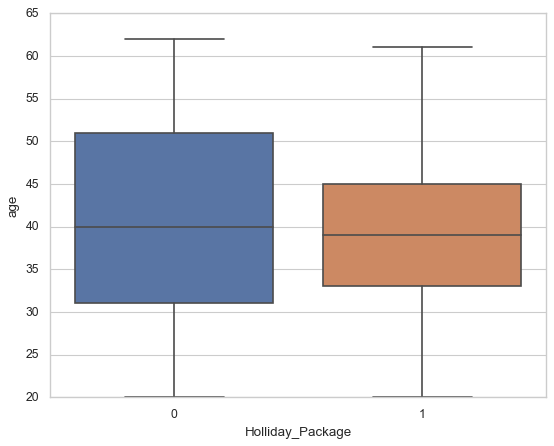

In [152]:
sns.boxplot(H_data['Holliday_Package'],H_data['age']);

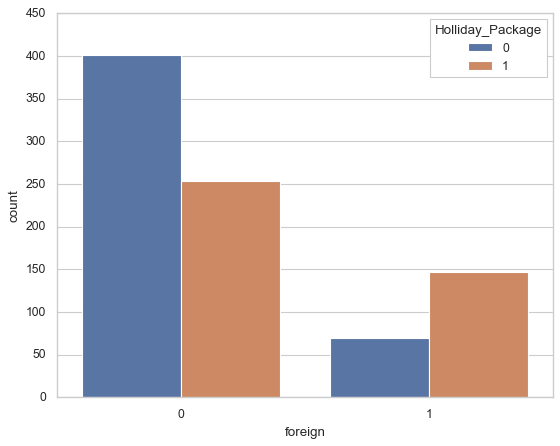

In [153]:
sns.countplot(H_data['foreign'],hue=H_data['Holliday_Package']);

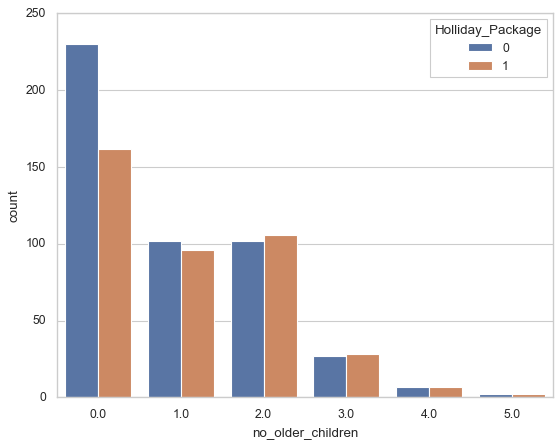

In [154]:
sns.countplot(H_data['no_older_children'],hue=H_data['Holliday_Package']);

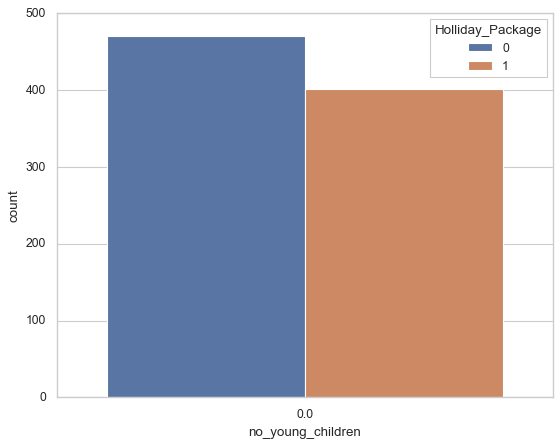

In [155]:
sns.countplot(H_data['no_young_children'],hue=H_data['Holliday_Package']);

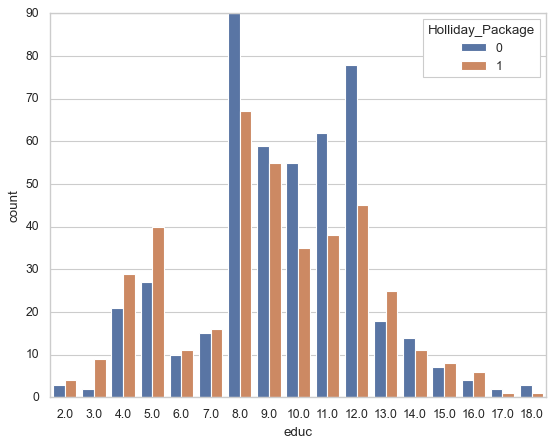

In [156]:
sns.countplot(H_data['educ'],hue=H_data['Holliday_Package']);

In [157]:
X = H_data.drop('Holliday_Package',axis=1)
Y = H_data.pop('Holliday_Package')

In [158]:
from sklearn import model_selection

In [159]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [160]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (609, 6)
Number of rows and columns of the training set for the dependent variable: (609,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [161]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [162]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

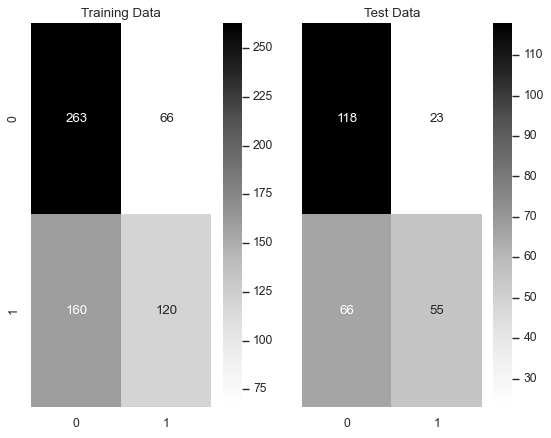

In [163]:
# Training Data and Test Data Confusion Matrix Comparison

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [164]:
# Training Data and Test Data Classification Report Comparison

print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.43      0.52       280

    accuracy                           0.63       609
   macro avg       0.63      0.61      0.61       609
weighted avg       0.63      0.63      0.61       609
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.84      0.73       141
           1       0.71      0.45      0.55       121

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.64       262
weighted avg       0.67      0.66      0.65       262
 



In [165]:
# Probability prediction for the training and test data

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [166]:
pred_prob_train[:,1]

array([0.71503418, 0.72966648, 0.38273875, 0.46907028, 0.21213966,
       0.40694691, 0.37559785, 0.32863697, 0.29916867, 0.31890275,
       0.71097879, 0.30550591, 0.47653447, 0.29515427, 0.71992516,
       0.43825429, 0.66951368, 0.71922242, 0.48033951, 0.61957247,
       0.54870611, 0.49500044, 0.72198778, 0.45546152, 0.29889402,
       0.68229992, 0.31741169, 0.44656168, 0.40011889, 0.39663501,
       0.43106604, 0.44445345, 0.28941319, 0.67962789, 0.36614931,
       0.40269054, 0.50665986, 0.52829007, 0.65422539, 0.48711543,
       0.34160657, 0.48162004, 0.33024518, 0.41602521, 0.4049406 ,
       0.49837569, 0.45780557, 0.48753224, 0.42225161, 0.589804  ,
       0.41892337, 0.51918589, 0.66156748, 0.68415465, 0.43012229,
       0.43725968, 0.33788849, 0.35481828, 0.70598317, 0.71033593,
       0.48833668, 0.4814363 , 0.21852063, 0.52693017, 0.23120337,
       0.36920537, 0.39354115, 0.41442635, 0.33673947, 0.39228586,
       0.69749493, 0.20120561, 0.62847208, 0.61697374, 0.37172

AUC for the Training Data: 0.663
AUC for the Test Data: 0.670


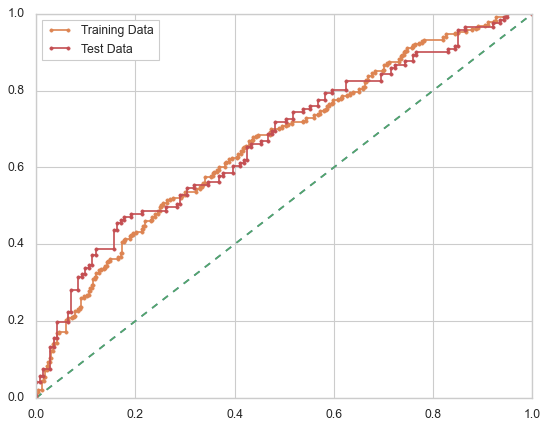

In [167]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 2.4      Inference: Basis on these predictions, what are the insights and recommendations.

*  The training and testing data is almost the same for both the models. 
* 	Logistic regression gave better results than the LDA model. 
* 	Because of the poor predictors, we didn't get a good recall value. 
* 	We got the same recall value of 45 for the logistic model and LDA model. All the attributes aren't highly correlated with       each other as well.
* 	The AUC score for both the training and testing dataset is almost the same for both the models.
* 	We can say that based on the predictions, 
* 	Employees with medium to high level salary and with age range between 30 and 45 are choosing holliday_package. 
* 	Employees with very young children are not interested in choosing holliday_package.
* 	It is recommended for the company to focus on employees with medium level salaries and who are in middle ages (30-45). 
* 	They can neglect the factor years of formal education, since it is not showing much relation with the target variable or       other attributes.
* 	Foreigners are also not the main factor but they can give the second importance to that factor.
* 	Employees with children who are not very young and very old are opting for holiday packages
* 	The important factors that company can focus on to sell their packages are salary and age.


## Thank You